In [7]:
import os
import pandas as pd
import numpy as np
import ast
import re

In [8]:
!pip install scienceplots

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
plt.style.use(['science','no-latex'])
plt.rcParams["figure.figsize"] = (6, 5)
sns.color_palette("muted")

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [10]:
# folder path
folder_path = "Theses_raw_data"

In [11]:
# text cleaning function
def clean_texts(text):
    try:
        data = ast.literal_eval(text)
        if isinstance(data, dict) and "Texts" in data:
            for item in data["Texts"]:
                if item.get("lang") == "en":
                    clean_text = item.get("text", "").strip()
                    clean_text = re.sub(r"<[^>]+>", " ", clean_text)
                    clean_text = re.sub(r"\s+", " ", clean_text).strip()  
                    clean_text = clean_text.lower() 
                    clean_text = re.sub(r"[^a-z\s]", "", clean_text)
                    return clean_text
    except (ValueError, SyntaxError):
        pass
    return text

In [12]:
dataframes = []

# File loop
for i in range(16):  
    file_path = os.path.join(folder_path, f"patent_chunk_{i}.csv")
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        
        # Apply cleaning functions
        df["Titles"] = df["Titles"].apply(clean_texts)
        df["Abstracts"] = df["Abstracts"].apply(clean_texts)
        df["Claims"] = df["Claims"].apply(clean_texts)
        
        # Remove duplicates, NaN, Descriptions & Legal status col
        df = df.drop(columns=["Descriptions"], errors='ignore')
        df = df.drop(columns=["LegalStatus"], errors='ignore')
        df = df.dropna()
        df.drop_duplicates()
        
        dataframes.append(df)

# Concatenate df
final_df = pd.concat(dataframes, ignore_index=True)

In [13]:
# Display the final dataframe
final_df.head()

,CountryCode,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate
0,US,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation system for int...,"['A61B17/02', 'A61B17/16', 'A61B34/20', 'A61B3...","['A61B17/1675', 'A61B2034/2055', 'A61B34/20', ...",ORTHOSOFT ULC,20201216
1,US,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation method for in...,"['A61B17/16', 'A61B34/20', 'A61B34/30']","['A61B17/154', 'A61B17/1675', 'A61B2034/2048',...",ORTHOSOFT ULC,20201216
2,US,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope ...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524
3,US,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope...,"['A61B34/10', 'A61B34/20', 'A61B34/32']","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524
4,US,US20240594287,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,canceled a method for controlling a roboti...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,20220524


In [14]:
print(final_df.describe())
print(final_df.info())

       EarliestPriorityDate
count          7.735300e+04
mean           2.018082e+07
std            2.119088e+04
min            2.015010e+07
25%            2.016100e+07
50%            2.018052e+07
75%            2.020012e+07
max            2.024083e+07
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77353 entries, 0 to 77352
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CountryCode             77353 non-null  object
 1   ApplicationNumber       77353 non-null  object
 2   Titles                  77353 non-null  object
 3   Abstracts               77353 non-null  object
 4   Claims                  77353 non-null  object
 5   IPCs                    77353 non-null  object
 6   CPCs                    77353 non-null  object
 7   ProbablePatentAssignee  77353 non-null  object
 8   EarliestPriorityDate    77353 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 5.3+ MB
None


In [15]:
#Date Convert
final_df['EarliestPriorityDate'] = final_df['EarliestPriorityDate'].astype(int)
final_df['EarliestPriorityDate'] = pd.to_datetime(final_df['EarliestPriorityDate'].astype(str), format='%Y%m%d')

In [16]:
unique_CountryCode = final_df['CountryCode'].unique()
print(unique_CountryCode)

['US']


In [17]:
 final_df = final_df.drop(columns=["CountryCode"], errors='ignore')

In [18]:
print(f"Number of unique Application no's: {len(final_df.ApplicationNumber.unique())}")
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Application no's: 51969
Number of unique Abstracts: 43217
Number of unique Claims: 76434


In [19]:
final_df["claim_length"] = final_df.Claims.apply(lambda x: len(x.split(" ")))
final_df["abstract_length"] = final_df.Abstracts.apply(lambda x: len(x.split(" ")))

In [20]:
final_df.head()

,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate,claim_length,abstract_length
0,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation system for int...,"['A61B17/02', 'A61B17/16', 'A61B34/20', 'A61B3...","['A61B17/1675', 'A61B2034/2055', 'A61B34/20', ...",ORTHOSOFT ULC,2020-12-16,710,113
1,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation method for in...,"['A61B17/16', 'A61B34/20', 'A61B34/30']","['A61B17/154', 'A61B17/1675', 'A61B2034/2048',...",ORTHOSOFT ULC,2020-12-16,1816,113
2,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope ...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1012,105
3,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope...,"['A61B34/10', 'A61B34/20', 'A61B34/32']","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1038,105
4,US20240594287,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,canceled a method for controlling a roboti...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,725,105


In [21]:
print(f"Avg. number of words in Claims: {np.mean(final_df.claim_length):.2f}")
print(f"Avg. number of words in Abstracts: {np.mean(final_df.abstract_length):.2f}")
print(f"Total number of words in Claims: {final_df.claim_length.sum()}")
print(f"Total number of words in Abstracts: {final_df.abstract_length.sum()}")

Avg. number of words in Claims: 1136.42
Avg. number of words in Abstracts: 114.32
Total number of words in Claims: 87905325
Total number of words in Abstracts: 8842986


In [22]:
ApplicationNumber_counts = final_df['ApplicationNumber'].value_counts()
repeating_ApplicationNumber = ApplicationNumber_counts[ApplicationNumber_counts > 1].index
repeating = final_df[final_df['ApplicationNumber'].isin(repeating_ApplicationNumber)]
print(repeating)

      ApplicationNumber                                             Titles  \
0         US20210552492  knee arthroplasty validation and gap balancing...   
1         US20210552492  knee arthroplasty validation and gap balancing...   
2         US20230466010  systems and methods for selfalignment and adju...   
3         US20230466010  systems and methods for selfalignment and adju...   
5         US20210617360  temporally balanced multimode master imaging s...   
...                 ...                                                ...   
77210     US20150598480            imaging based instrument event tracking   
77267     US20160050350                               pliable camera cover   
77268     US20160050350                               pliable camera cover   
77305     US20150624857             ophthalmic tool for eye imaging device   
77306     US20150624857             ophthalmic tool for eye imaging device   

                                               Abstracts  \
0  

In [23]:
_76088 = final_df.loc[76088,'Claims']
print(_76088)

  a doppler phantom comprising a first reservoir a second reservoir a fluid line coupling the first reservoir and the second reservoir a pressure line coupling the first reservoir and the second reservoir and a tissue mimicking material surrounding at least the fluid line wherein the phantom can be positioned in at least a first position and a section position wherein the first reservoir defines an elevated reservoir and the second reservoir defines a lower reservoir in the first position wherein the second reservoir defines the elevated reservoir and the first reservoir defines the lower reservoir in the second position wherein the fluid line defines a path for fluid to travel from the elevated reservoir to the lower reservoir in either of the first position or the second position and wherein the pressure line defines a path for gas to transfer from the lower reservoir to the elevated reservoir while the fluid travels in either of the first position or the second position and wherein 

In [24]:
_76089 = final_df.loc[76089,'Claims']
print(_76089)

  a doppler phantom comprising a first reservoir a second reservoir a fluid line coupling the first reservoir and the second reservoir a pressure line coupling the first reservoir and the second reservoir and a tissue mimicking material surrounding at least the fluid line wherein the phantom can be positioned in at least a first position and a section position wherein the first reservoir defines an elevated reservoir and the second reservoir defines a lower reservoir in the first position wherein the second reservoir defines the elevated reservoir and the first reservoir defines the lower reservoir in the second position wherein the fluid line defines a path for fluid to travel from the elevated reservoir to the lower reservoir in either of the first position or the second position and wherein the pressure line defines a path for gas to transfer from the lower reservoir to the elevated reservoir while the fluid travels in either of the first position or the second position and wherein 

In [25]:
final_df.drop_duplicates()

,ApplicationNumber,Titles,Abstracts,Claims,IPCs,CPCs,ProbablePatentAssignee,EarliestPriorityDate,claim_length,abstract_length
0,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation system for int...,"['A61B17/02', 'A61B17/16', 'A61B34/20', 'A61B3...","['A61B17/1675', 'A61B2034/2055', 'A61B34/20', ...",ORTHOSOFT ULC,2020-12-16,710,113
1,US20210552492,knee arthroplasty validation and gap balancing...,to address technical problems facing knee arth...,a knee arthroplasty validation method for in...,"['A61B17/16', 'A61B34/20', 'A61B34/30']","['A61B17/154', 'A61B17/1675', 'A61B2034/2048',...",ORTHOSOFT ULC,2020-12-16,1816,113
2,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope ...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1012,105
3,US20230466010,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,a method for controlling a robotic endoscope...,"['A61B34/10', 'A61B34/20', 'A61B34/32']","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,1038,105
4,US20240594287,systems and methods for selfalignment and adju...,a method is provided for a robotic endoscope s...,canceled a method for controlling a roboti...,"['A61B34/10', 'A61B34/20', 'A61B34/30', 'A61B3...","['A61B1/00097', 'A61B1/0016', 'A61B1/005', 'A6...",NOAH MEDICAL CORP,2022-05-24,725,105
...,...,...,...,...,...,...,...,...,...,...
77348,US20150591907,warming gel system and method,a method of applying ultrasound gel including ...,a method of applying ultrasound gel comprisi...,"['A61B8/00', 'A61K49/22']","['A61B8/4281', 'A61K49/226']",THERMAL GEL LLC,2015-01-07,567,84
77349,US20150591941,networks for healing soft tissues,networks healing soft tissue disorders by pres...,a system for healing disordered human soft t...,"['B29C67/00', 'G05B19/4099']","['A61B2034/107', 'A61B2034/108', 'A61F2240/002...",BENJA ATHON ANUTHEP,2015-01-08,2136,42
77350,US20160991620,systems methods and computer program products ...,methods systems and computer program products ...,a method for removing sensitive or identifyi...,"['G06K9/46', 'G16H15/00', 'G16H30/20', 'H04N1/...","['G16H10/60', 'G16H15/00', 'G16H30/20', 'H04N1...",INTELEMAGE LLC,2015-01-09,866,45
77351,US20150591701,retractor cannula and method of use,a cannula capable of accommodating an endoscop...,a cannula for permitting passage of an endos...,"['A61B1/00', 'A61B17/34']","['A61B1/00154', 'A61B1/317', 'A61B1/32', 'A61B...",SEXTON NICHOLES,2015-01-07,419,76


In [75]:
print(f"Number of unique Abstracts: {len(final_df.Abstracts.unique())}")
print(f"Number of unique Claims: {len(final_df.Claims.unique())}")

Number of unique Abstracts: 43217
Number of unique Claims: 76434


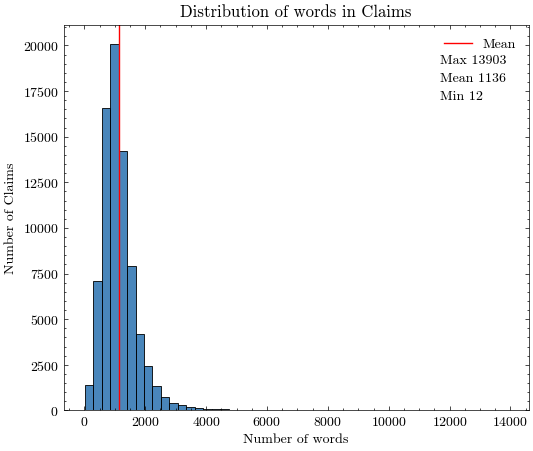

In [26]:
sns.histplot(final_df.claim_length, bins = 50)
plt.axvline(np.mean(final_df.claim_length), color = "r",label = "Mean")
plt.text(11700, 19000, f"Max {max(final_df.claim_length)}")
plt.text(11700, 17000, f"Min {min(final_df.claim_length)}")
plt.text(11700, 18000, f"Mean {np.mean(final_df.claim_length):.0f}")
plt.title("Distribution of words in Claims")
plt.xlabel("Number of words")
plt.ylabel("Number of Claims")
plt.legend()
plt.show()

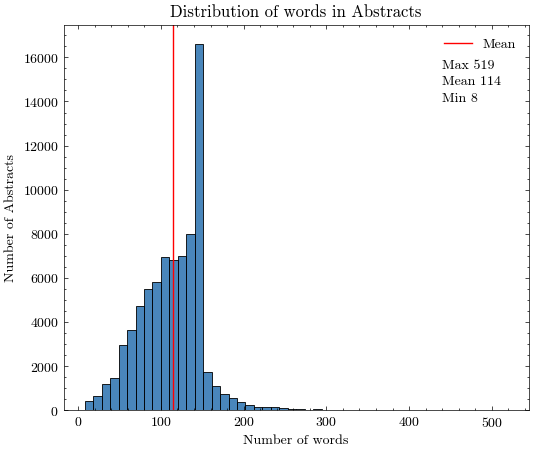

In [27]:
sns.histplot(final_df.abstract_length, bins = 50)
plt.axvline(np.mean(final_df.abstract_length), color = "r", label = "Mean")
plt.text(440, 15500, f"Max {max(final_df.abstract_length)}")
plt.text(440, 14000, f"Min {min(final_df.abstract_length)}")
plt.text(440, 14750, f"Mean {np.mean(final_df.abstract_length):.0f}")
plt.title("Distribution of words in Abstracts")
plt.xlabel("Number of words")
plt.ylabel("Number of Abstracts")
plt.legend()
plt.show()

In [28]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77353 entries, 0 to 77352
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ApplicationNumber       77353 non-null  object        
 1   Titles                  77353 non-null  object        
 2   Abstracts               77353 non-null  object        
 3   Claims                  77353 non-null  object        
 4   IPCs                    77353 non-null  object        
 5   CPCs                    77353 non-null  object        
 6   ProbablePatentAssignee  77353 non-null  object        
 7   EarliestPriorityDate    77353 non-null  datetime64[ns]
 8   claim_length            77353 non-null  int64         
 9   abstract_length         77353 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 5.9+ MB


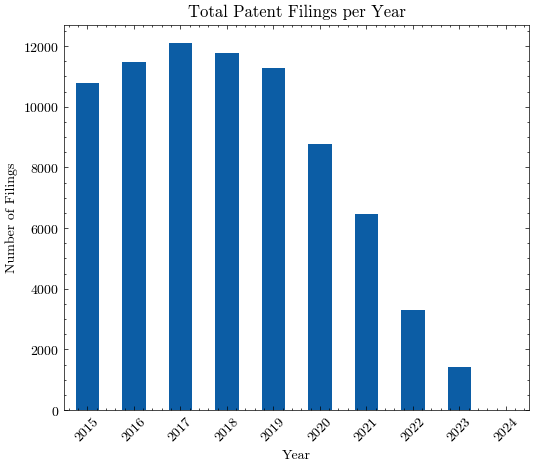

In [29]:
# Distribution if fillings per year
final_df['Year'] = final_df['EarliestPriorityDate'].dt.year
total_filings_per_year = final_df.groupby('Year')['ApplicationNumber'].count()

total_filings_per_year.plot(kind='bar')
plt.title('Total Patent Filings per Year')
plt.xlabel('Year')
plt.ylabel('Number of Filings')
plt.xticks(rotation=45)
plt.show()

In [47]:
company_patent_counts = final_df.groupby('ProbablePatentAssignee')['ApplicationNumber'].count().reset_index()
sorted_companies = company_patent_counts.sort_values(by='ApplicationNumber', ascending=False)
top_50_companies = sorted_companies.head(50)

top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)

print(top_50_companies)

                                 ProbablePatentAssignee  No of applications
6004                                       OLYMPUS CORP                3250
1706                                     CILAG GMBH INT                2445
2963                             FUJIFILM HOLDINGS CORP                2251
1938                                        COVIDIEN LP                2111
6408                                PHILIPS KONINKLL NV                2045
1402                                          CANON INC                1451
1098                        BIOSENSE WEBSTER ISRAEL LTD                1310
4005                  INTUITIVE SURGICAL OPERATIONS INC                1261
1226                       BOSTON SCIENTIFIC SCIMED INC                 982
7457                            SIEMENS HEALTHINEERS AG                 796
744                                    AURIS HEALTH INC                 581
5138                                      MEDTRONIC INC                 538
8845        

/var/folders/v1/967x2jt96y7374fqc3v404pc0000gn/T/ipykernel_32759/1271430457.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_50_companies.rename(columns={'ApplicationNumber': 'No of applications'}, inplace=True)


In [33]:
def split_codes(df, col_name):
    # Split the codes by delimiter and explode into separate rows
    exploded_df = df[col_name].str.split(',', expand=True).stack().reset_index(level=1, drop=True)
    exploded_df = exploded_df.str.replace(r"[\[\]']", "", regex=True)  # Clean up the exploded values
    return exploded_df.to_frame(name=col_name)

# Create new DataFrames for IPC and CPC codes
ipc_df = split_codes(final_df, 'IPCs')
cpc_df = split_codes(final_df, 'CPCs')

# Display the exploded DataFrames
print("\nExploded IPC DataFrame:")
print(ipc_df)

print("\nExploded CPC DataFrame:")
print(cpc_df)



Exploded IPC DataFrame:
             IPCs
0       A61B17/02
0       A61B17/16
0       A61B34/20
0       A61B34/30
1       A61B17/16
...           ...
77351   A61B17/34
77352   A61B17/56
77352   A61B17/88
77352    A61B8/08
77352    A61B8/12

[382028 rows x 1 columns]

Exploded CPC DataFrame:
                 CPCs
0         A61B17/1675
0       A61B2034/2055
0           A61B34/20
0           A61B34/30
1          A61B17/154
...               ...
77351    A61B2017/348
77351   A61B2017/3484
77351   A61B2017/3486
77352      A61B8/0875
77352        A61B8/12

[1253442 rows x 1 columns]


In [34]:
ipc_category_counts = ipc_df['IPCs'].value_counts()
cpc_category_counts = cpc_df['CPCs'].value_counts()

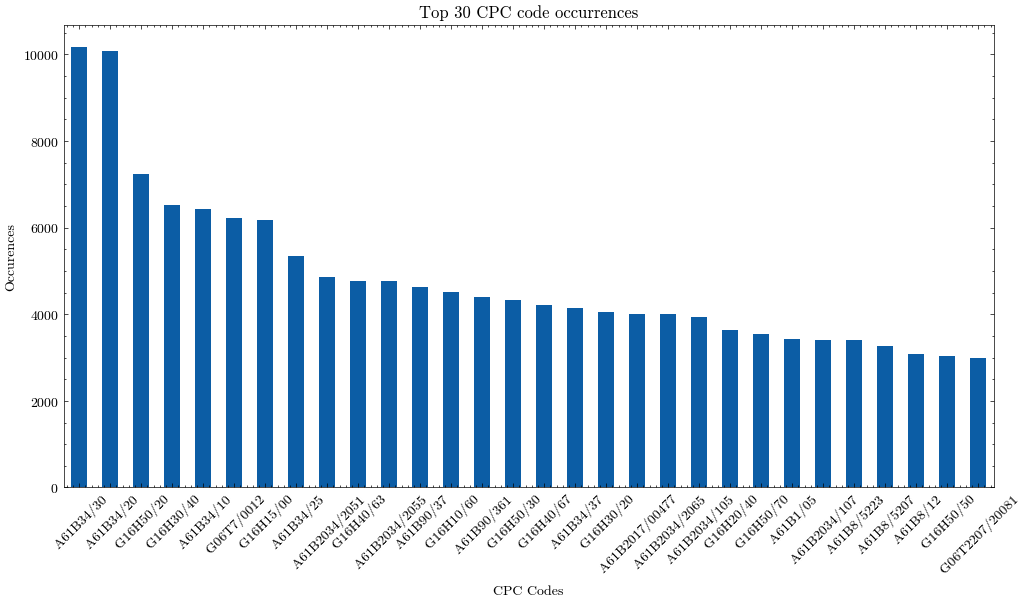

In [35]:
plot = cpc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 CPC code occurrences')
plt.xlabel('CPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

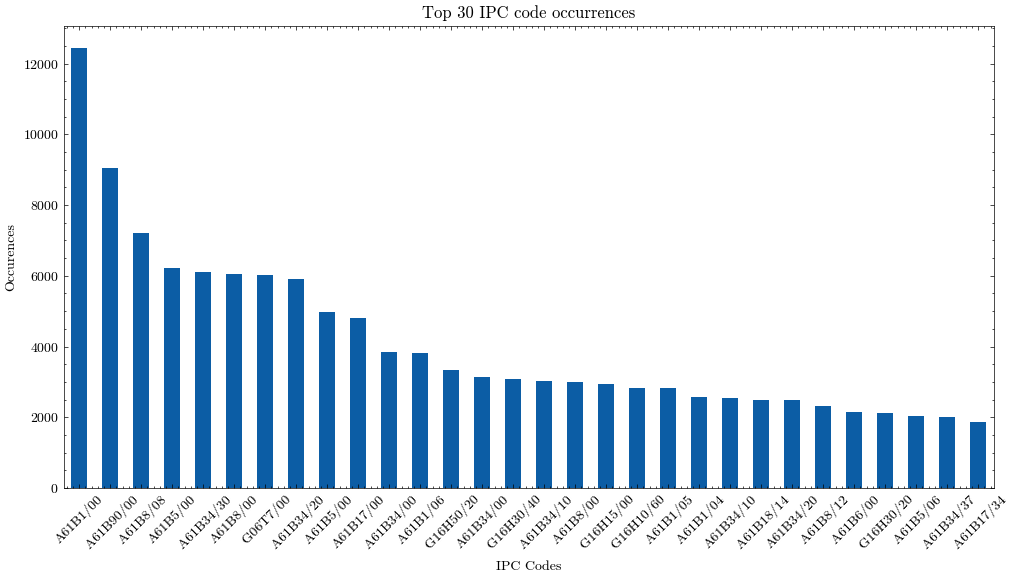

In [39]:
plot = ipc_category_counts.nlargest(30).plot(kind='bar', figsize=(12, 6))
plt.title('Top 30 IPC code occurrences')
plt.xlabel('IPC Codes')
plt.ylabel('Occurences')
plt.xticks(rotation=45)
plt.show()

In [49]:
final_df.to_csv("text.csv", index=False)